##### Importando bibliotecas

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.mode.copy_on_write = True
from scipy import stats
import numpy as np

##### Importando base de dados

In [2]:
dados = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

##### Visualizando dados

In [3]:
dados.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
dados.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [6]:
dados.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


##### Verificando o tamanho do dataset

In [7]:
dados.shape

(4340, 8)

##### Verificando colunas de tipo 'objeto'

In [8]:
dados['name'].value_counts().reset_index()

,name,count
0,Maruti Swift Dzire VDI,69
1,Maruti Alto 800 LXI,59
2,Maruti Alto LXi,47
3,Maruti Alto LX,35
4,Hyundai EON Era Plus,35
...,...,...
1486,Hyundai Verna Transform CRDi VGT SX ABS,1
1487,Maruti S-Presso VXI Plus,1
1488,Toyota Etios Liva 1.2 VX,1
1489,Toyota Yaris G,1


In [9]:
dados['fuel'].value_counts().reset_index()

,fuel,count
0,Diesel,2153
1,Petrol,2123
2,CNG,40
3,LPG,23
4,Electric,1


In [10]:
dados['seller_type'].value_counts().reset_index()

,seller_type,count
0,Individual,3244
1,Dealer,994
2,Trustmark Dealer,102


In [11]:
dados['transmission'].value_counts().reset_index()

,transmission,count
0,Manual,3892
1,Automatic,448


In [12]:
dados['owner'].value_counts().reset_index()

,owner,count
0,First Owner,2832
1,Second Owner,1106
2,Third Owner,304
3,Fourth & Above Owner,81
4,Test Drive Car,17


##### Transformando objetos em valores numéricos, para analisar estatisticamente
##### Obs: Para isso, precisamos primeiro criar uma cópia do Dataframe original

In [13]:
dados_numericos = dados.copy()

In [14]:
transmission_map = {'Manual': 0, 'Automatic': 1}
dados_numericos['transmission'] = dados_numericos['transmission'].map(transmission_map)

In [15]:
seller_type_map = {'Individual': 0, 'Dealer': 1, 'Trustmark Dealer': 2}
dados_numericos['seller_type'] = dados_numericos['seller_type'].map(seller_type_map)

In [16]:
fuel_map = {'Diesel': 0, 'Petrol': 1, 'CNG': 2, 'LPG': 3, 'Electric': 4}
dados_numericos['fuel'] = dados_numericos['fuel'].map(fuel_map)

In [17]:
owner_map = {'First Owner': 0, 'Second Owner': 1, 'Third Owner': 2, 'Fourth & Above Owner': 3, 'Test Drive Car': 4}
dados_numericos['owner'] = dados_numericos['owner'].map(owner_map)

In [18]:
# Separando o 1° nome da coluna 'name' para identifcar a marca
dados['name'] = dados['name'].str.split().str[0]

In [19]:
name_map = {'Maruti': 0, 'Hyundai': 1, 'Mahindra': 2, 'Tata': 3, 'Honda': 4, 'Ford': 5, 'Toyota': 6,
            'Chevrolet': 7, 'Renault': 8, 'Volkswagen': 9, 'Skoda': 10, 'Nissan': 11, 'Audi': 12,
            'BMW': 13, 'Fiat': 14, 'Datsun': 15, 'Mercedes-Benz': 16, 'Jaguar': 17, 'Mitsubichi': 18,
            'Land': 19, 'Volvo': 20, 'Ambassador': 21, 'Jeep': 22, 'MG': 23, 'OpelCorsa': 24}
carros_x = {variavel: 25 for variavel in dados['name'] if variavel not in name_map}
name_map.update(carros_x)
dados_numericos['name'] = dados['name'].map(name_map)

In [20]:
dados_numericos.isnull().sum().reset_index()

,index,0
0,name,0
1,year,0
2,selling_price,0
3,km_driven,0
4,fuel,0
5,seller_type,0
6,transmission,0
7,owner,0


##### Criando matriz de correlação

In [21]:
dados_numericos.corr()['selling_price'].abs().sort_values().reset_index()

,index,selling_price
0,km_driven,0.192289
1,owner,0.198833
2,seller_type,0.240666
3,fuel,0.275462
4,name,0.384260
5,year,0.413922
6,transmission,0.530205
7,selling_price,1.000000


##### Criando um DataFrame para fazer um boxplot name x selling_price

In [22]:
dados_marca_boxplot = dados[['name', 'selling_price']].copy()

##### Criando um DataFrame para fazer um boxplot name x km_driven

In [23]:
dados_km_driven_boxplot = dados_numericos.copy()

In [24]:
intervalos = pd.interval_range(start=0, end=806599, freq=20000)
dados_km_driven_boxplot['km_driven'] = pd.cut(dados_km_driven_boxplot['km_driven'], bins=intervalos)

In [25]:
dados_km_driven_boxplot

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,0,2007,60000,"(60000, 80000]",1,0,0,0
1,0,2007,135000,"(40000, 60000]",1,0,0,0
2,1,2012,600000,"(80000, 100000]",0,0,0,0
3,15,2017,250000,"(40000, 60000]",1,0,0,0
4,4,2014,450000,"(140000, 160000]",0,0,0,1
...,...,...,...,...,...,...,...,...
4335,1,2014,409999,"(60000, 80000]",0,0,0,1
4336,1,2014,409999,"(60000, 80000]",0,0,0,1
4337,0,2009,110000,"(80000, 100000]",1,0,0,1
4338,1,2016,865000,"(80000, 100000]",0,0,0,0


#### **Análises gráficas**

##### Boxplots

<Axes: title={'center': 'Preço do carro (R$)'}>

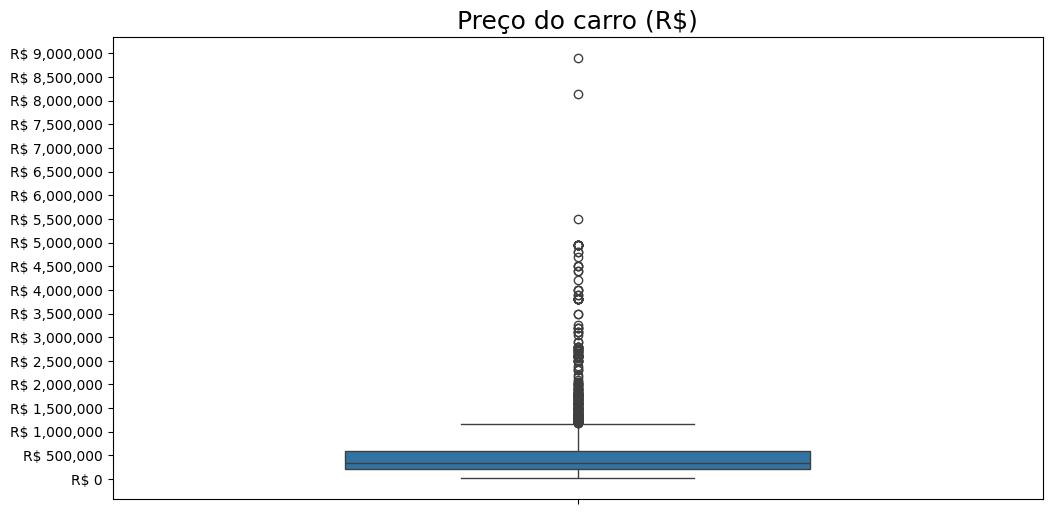

In [26]:
ax = sns.boxplot(data=dados['selling_price'], width = 0.5)
ax.figure.set_size_inches(12,6)
ax.set_title('Preço do carro (R$)', fontsize = 18)
ax.set_ylabel('', fontsize = 20)
ax.yaxis.set_major_formatter('R$ {x:,.0f}')
ax.yaxis.set_major_locator(plt.MaxNLocator(20))
ax

<Axes: title={'center': 'Preço por sistema de transmissão'}>

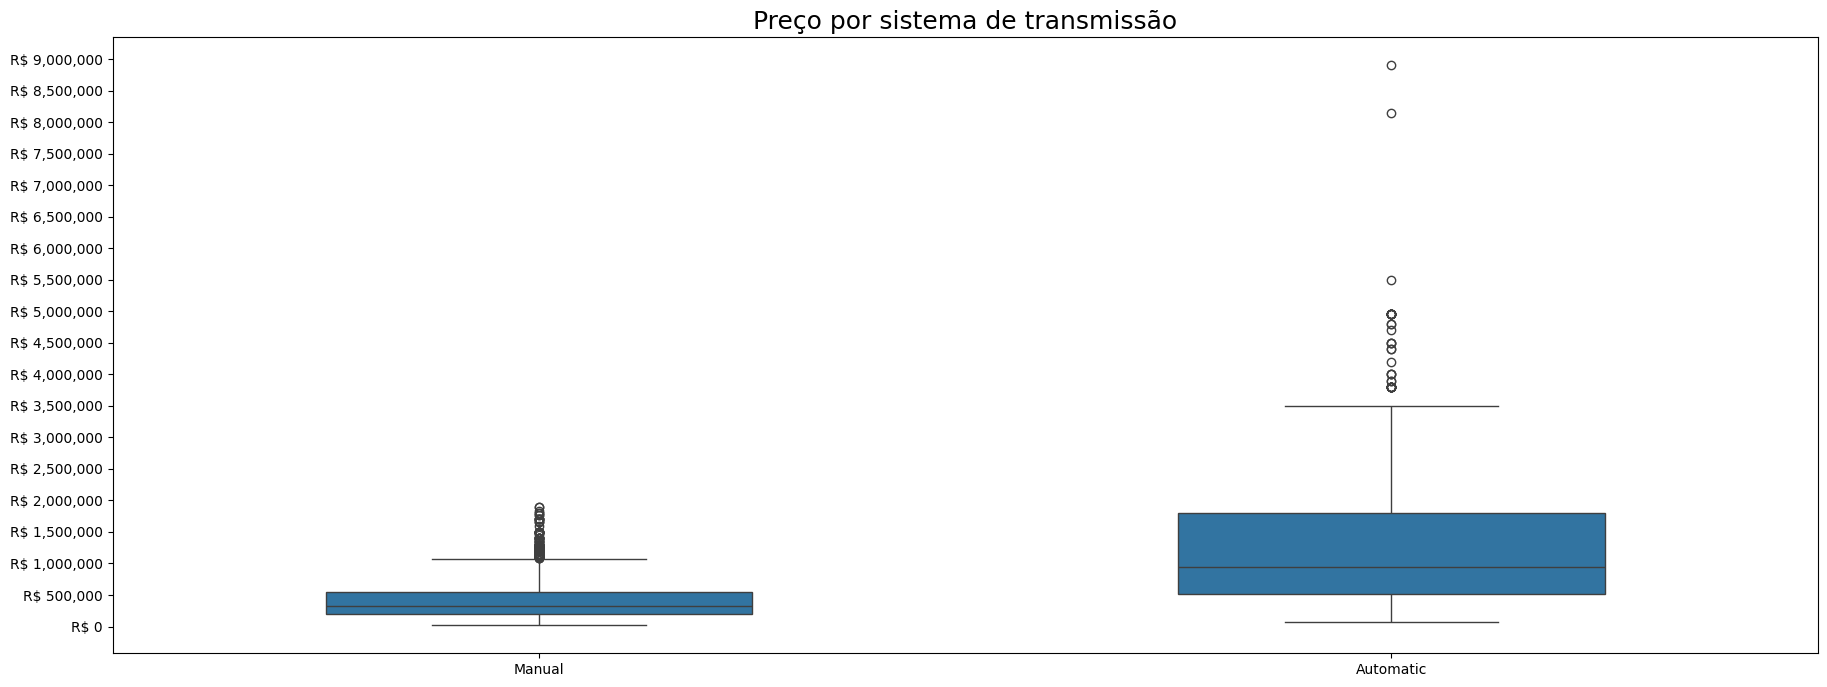

In [27]:
ax = sns.boxplot(x = 'transmission', y = 'selling_price', data = dados, orient = 'v', width = 0.5)
ax.figure.set_size_inches(22, 8)
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Preço por sistema de transmissão', fontsize = 18)
ax.set_ylabel('', fontsize = 12)
ax.set_xlabel('', fontsize = 12)
ax.yaxis.set_major_formatter('R$ {x:,.0f}')
ax.yaxis.set_major_locator(plt.MaxNLocator(20))
ax

##### Histogramas

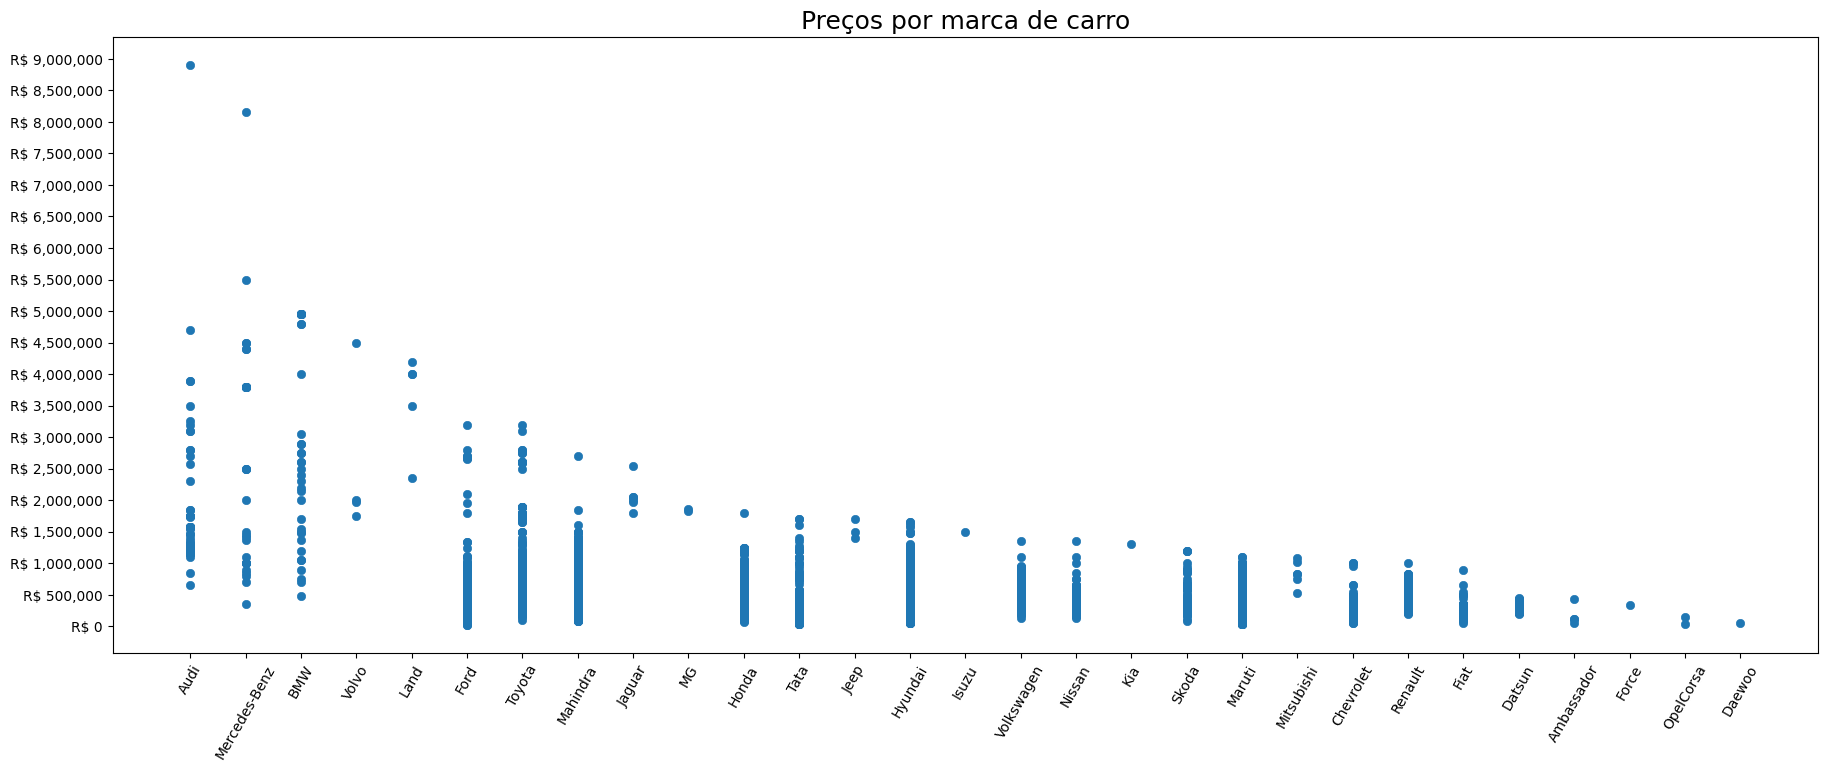

In [28]:
ax = sns.scatterplot(x='name', y='selling_price', data=dados_marca_boxplot[['name', 'selling_price']].sort_values(by='selling_price', ascending=False), edgecolor=None)
ax.figure.set_size_inches(22, 8)
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
ax.set_title('Preços por marca de carro', fontsize=18)
ax.set_ylabel('', fontsize=12)
ax.set_xlabel('', fontsize=12)
ax.yaxis.set_major_formatter('R$ {x:,.0f}')
ax.yaxis.set_major_locator(plt.MaxNLocator(20))

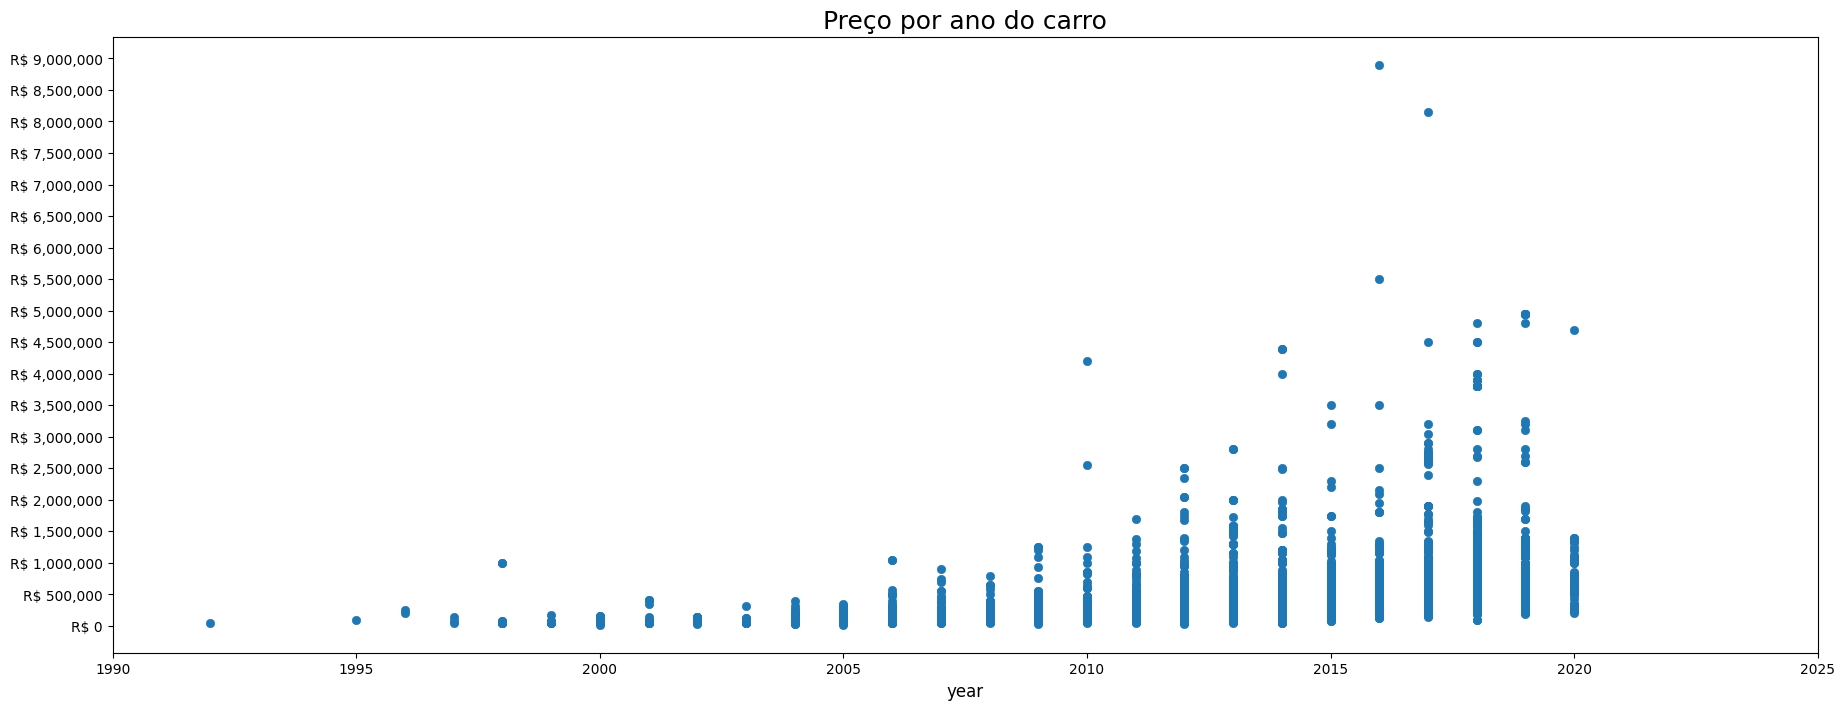

In [29]:
ax = sns.scatterplot(x='year', y='selling_price', data=dados_numericos, edgecolor=None)
ax.figure.set_size_inches(22, 8)
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Preço por ano do carro', fontsize=18)
ax.set_ylabel('', fontsize=12)
ax.set_xlabel('year', fontsize=12)
ax.yaxis.set_major_formatter('R$ {x:,.0f}')
ax.yaxis.set_major_locator(plt.MaxNLocator(20))

##### Tratando outliers

In [30]:
# Verificando média e desvio antes do tratamento
print('Média de selling_price:', np.mean(dados_numericos['selling_price']))
print('Desvio padrão de selling_price:', np.std(dados_numericos['selling_price']))

Média de selling_price: 504127.3117511521
Desvio padrão de selling_price: 578482.0792187806


In [31]:
dados_numericos = dados_numericos.drop(dados_numericos[dados_numericos['selling_price'] > 1500000].index)

In [32]:
# Verificando média e desvio depois do tratamento
print('Média de selling_price:', np.mean(dados_numericos['selling_price']))
print('Desvio padrão de selling_price:', np.std(dados_numericos['selling_price']))

Média de selling_price: 416723.0279971285
Desvio padrão de selling_price: 286543.21298337955


##### **Criando modelo de regressão linear**

In [33]:
# Importando train_test_split da biblioteca scikit-learn
from sklearn.model_selection import train_test_split

In [34]:
# Criando a variável dependente (y)
y = dados_numericos['selling_price']

In [35]:
# Criando um dataframe para armazenar as variáveis independentes (X)
X = dados_numericos.drop(columns=['selling_price', 'owner', 'km_driven'])

In [36]:
# Criando os datasets de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state = 2811)

In [37]:
# Importando LinearRegression metrics da biblioteca scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [38]:
# Utilizando o método fit() para estimar o modelo linear utilizando os dados de treino (y_train e X_train)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [39]:
training_data_prediction = model.predict(X_train)

In [40]:
# Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de treino
print('R² = {}'.format(model.score(X_train, y_train).round(2)))

R² = 0.5


In [41]:
# Gerando previsões para os dados de teste (X_test) utilizando o método predict()
test_data_prediction = model.predict(X_test)

In [42]:
# Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo
print(f'R² = {(metrics.r2_score(y_test, test_data_prediction)).round(2)}')

R² = 0.51


##### Visualizando os preços atuais e os preços previstos

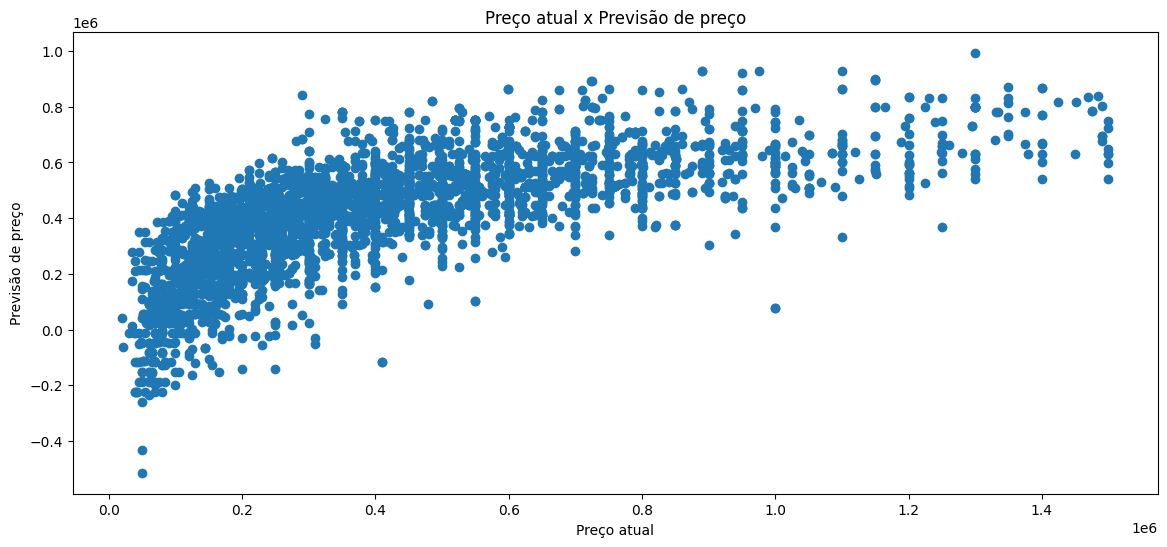

In [43]:
plt.figure(figsize=(14, 6))
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Preço atual")
plt.ylabel("Previsão de preço")
plt.title("Preço atual x Previsão de preço")
plt.show()

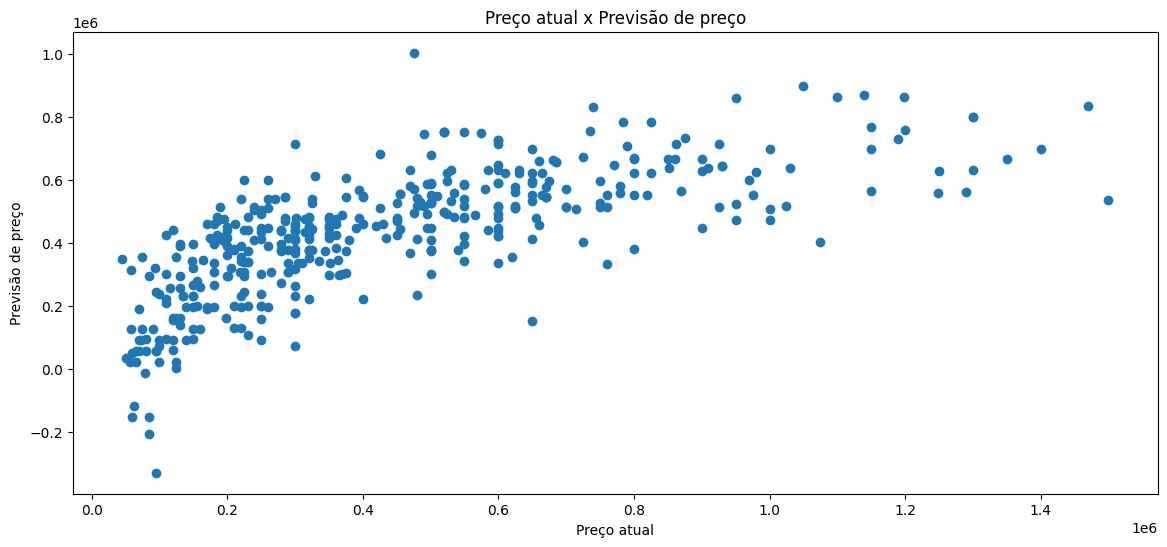

In [44]:
plt.figure(figsize=(14, 6))
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Preço atual")
plt.ylabel("Previsão de preço")
plt.title("Preço atual x Previsão de preço")
plt.show()